# 使用神经网络来训练获得Embedding矩阵

In [ ]:
import tensorflow as tf
# 确保tensorflow的版本是2.x
try:
  %tensorflow_version 2.x
except Exception:
  pass

print(tf.__version__)

2.3.0


In [ ]:
# 导入对应的库
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 初始化参数：
# 词汇表大小
vocab_size = 10000
# 词嵌入矩阵的维度
embedding_dim = 16
# 填充到最大长度为100
max_length = 100
# 填充类型是向后填充
padding_type = 'post'

trunc_type = 'post'

# 对未知单词进行的标记
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
# 下载数据集

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-09-19 13:19:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-09-19 13:19:58 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# 加载数据集
with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
# 分配数据集：多少是训练集、多少是测试集
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
# 对训练集进行分词处理
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
# 进行分词处理，获得词汇表
tokenizer.fit_on_texts(training_sentences)
print(len(training_sentences))
print(tokenizer)
# 获得词索引
word_index = tokenizer.word_index
print(word_index)

# 将文本数据转换为数字序列(应该是对句子进行处理)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
print(training_sentences[0:2])
print(training_sequences[0:2])
# 对数字序列进行填充
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(training_padded[0:2])
print(type(training_padded))
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,padding=padding_type,truncating = trunc_type)

20000
{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'be': 22, 'up': 23, 'out': 24, 'that': 25, 'how': 26, 'as': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'what': 32, 'his': 33, 'all': 34, 'he': 35, 'will': 36, 'who': 37, 'just': 38, 'has': 39, 'more': 40, 'one': 41, 'year': 42, 'into': 43, 'report': 44, 'have': 45, 'why': 46, 'over': 47, 'area': 48, 'u': 49, 'donald': 50, 'says': 51, 'day': 52, 'can': 53, 's': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'get': 59, 'old': 60, 'no': 61, 'her': 62, "trump's": 63, 'off': 64, 'now': 65, 'an': 66, 'obama': 67, 'life': 68, 'people': 69, 'women': 70, 'house': 71, "'": 72, 'was': 73, 'still': 74, 'white': 75, 'back': 76, 'make': 77, 'than': 78, 'clinton': 79, 'down': 80, 'when': 81, 'my': 82, '5': 83, 'could': 84, 'world': 85, 'americans': 86, 'if': 87,

In [ ]:
# 将数据转换为numpy数组
import numpy as np

print(type(training_padded))
training_padded = np.array(training_padded)
print(type(training_padded))
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# 构建神经网络模型
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

# 编译模型
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded,training_labels,epochs = num_epochs,validation_data = (testing_padded,testing_labels),verbose = 2)

Epoch 1/30
625/625 - 3s - loss: 0.6618 - accuracy: 0.5976 - val_loss: 0.5709 - val_accuracy: 0.7994
Epoch 2/30
625/625 - 3s - loss: 0.4298 - accuracy: 0.8341 - val_loss: 0.3841 - val_accuracy: 0.8411
Epoch 3/30
625/625 - 2s - loss: 0.3129 - accuracy: 0.8751 - val_loss: 0.3537 - val_accuracy: 0.8511
Epoch 4/30
625/625 - 3s - loss: 0.2619 - accuracy: 0.8977 - val_loss: 0.3463 - val_accuracy: 0.8550
Epoch 5/30
625/625 - 2s - loss: 0.2256 - accuracy: 0.9136 - val_loss: 0.3502 - val_accuracy: 0.8526
Epoch 6/30
625/625 - 3s - loss: 0.1989 - accuracy: 0.9237 - val_loss: 0.3581 - val_accuracy: 0.8518
Epoch 7/30
625/625 - 3s - loss: 0.1773 - accuracy: 0.9330 - val_loss: 0.3640 - val_accuracy: 0.8542
Epoch 8/30
625/625 - 3s - loss: 0.1594 - accuracy: 0.9406 - val_loss: 0.3721 - val_accuracy: 0.8541
Epoch 9/30
625/625 - 2s - loss: 0.1421 - accuracy: 0.9491 - val_loss: 0.3916 - val_accuracy: 0.8512
Epoch 10/30
625/625 - 3s - loss: 0.1289 - accuracy: 0.9542 - val_loss: 0.4088 - val_accuracy: 0.8514

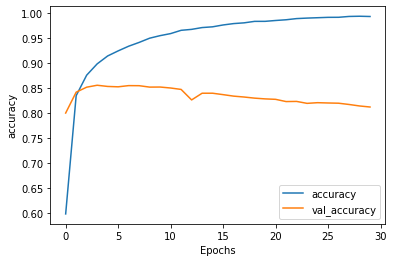

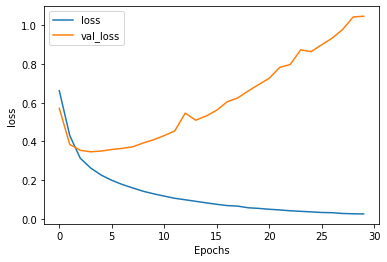

In [ ]:
# 绘制精度、损失图像
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_sentence(text):
  return ''.join([reverse_word_index.get(i,'?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former<OOV>storeclerksuesoversecret'black<OOV>forminorityshoppers????????????????????????????????????????????????????????????????????????????????????????
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv','w',encoding='utf-8')
out_m = io.open('meta.tsv','w',encoding='utf-8')

for word_num in range(1,vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word+'\n')
  out_v.write('\t'.join([str(x) for x in embeddings])+'\n')

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
print(sequences)
padded = pad_sequences(sequences, maxlen = max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1, 890, 2, 891, 1, 5, 4, 2565, 380, 22, 178], [249, 3, 1, 247, 3385, 2933, 20, 1551, 259]]
[[9.8809171e-01]
 [4.8534763e-05]]
